# Trabalho Prático 2

### 1. O problema consiste em encontrar um valor aproximado do zero da função:
$$
f(x) = \sin(x^2) + 1.1 - e^{-x}
$$

In [4]:
import matplotlib.pyplot as plt
import math

#função do enunciado
def f(x): 
    return math.sin(x**2) + 1.1 - math.e**-x

### a) Separação gráfica das raízes e determinação de um intervalo $I$ de amplitude $10^{-1}$ contendo a menor delas

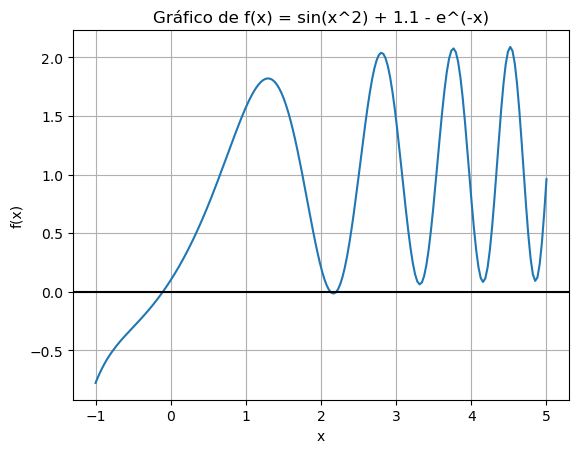

In [5]:
import numpy as np
x = np.linspace(-1, 5, 200) #200 pontos para ficar suave
y = [f(x) for x in x]
plt.plot(x, y)
plt.title("Gráfico de f(x) = sin(x^2) + 1.1 - e^(-x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.axhline(0, color='k')
plt.show()


Conclui-se, a partir da visualização do grafico acima, que a primeira raiz encontra-se muito próximo de 0

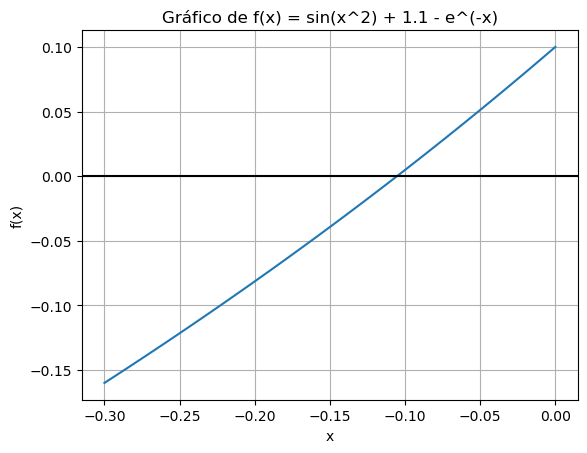

In [6]:
#Aproximação do grafico da funcao no intervalo entre -0.3 e 0
x = np.linspace(-0.3, 0)
y = [f(x) for x in x]
plt.plot(x, y)
plt.title("Gráfico de f(x) = sin(x^2) + 1.1 - e^(-x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.axhline(0, color='k')
plt.show()


Conclui-se assim que a menor raiz da função encontra-se no intervalo $I = [-0.15, -0.05]$ (amplitude $0.1$).


### b) Resolução usando o método das bisseções sucessivas e o método de Newton

#### i. Condições de aplicabilidade dos métodos em $I = [-0.15, -0.05]$

##### Método das bisseções sucessivas

1. $f(x)$ é contínua em $I$, pois é a função resulta da soma de funções contínuas.
2. $f(a)f(b) < 0$, ou seja, há troca de sinal em $I$. (demonstrado na célula de código em baixo)

In [7]:
a = -0.15
b = -0.05
res = f(a)*f(b)
print(res) # O resultado é negativo, logo f(a)f(b) < 0

-0.002015147279821439


##### Método de newton:
1. $f(x)$, $f'(x)$, $f''(x)$ existem e são contínuas em $I$. (demonstrado nas células de código abaixo)
2. $f(a) \cdot f(b) < 0$ (já verificado acima).
3. $f'(x) \neq 0$ para todo $x \in I$.  (demonstrado nas células de código abaixo)
4. $f''(x)$ não troca de sinal em $I$ (ou seja, é sempre $\geq 0$ ou sempre $\leq 0$).  (demonstrado nas células de código abaixo)
5. Existe pelo menos um $x_0 \in I$ tal que $f(x_0) \cdot f''(x_0) > 0$.  (demonstrado nas células de código abaixo)

In [8]:
# Definição das derivadas (são contínuas pois resultam da soma de funçoes contínuas)
def df(x):
    return 2*x*math.cos(x**2) + math.e**-x

def d2f(x):
    return 2*math.cos(x**2) - 4*x**2*math.sin(x**2) - math.e**-x

# Verificação de f'(x) != 0 em I
# Valores de f' em -0.15 e em -0.05:
print(f"f'(-0.15) = {df(-0.15)}")
print(f"f'(-0.05) = {df(-0.05)}")
#f'(x) vai ser sempre positivo.
#nao sei bem como fazer isto de maneira mais rigorosa

# Verificação de f''(x) não troca de sinal em I
# Valores de f'' em -0.15 e em -0.05:
print(f"f''(-0.15) = {d2f(-0.15)}")
print(f"f''(-0.05) = {d2f(-0.05)}")
#f''(x) vai ser sempre positivo.

# Verificação de existência de x0 em I tal que f(x0) * f''(x0) > 0
x0 = -0.05
print(f"f({x0}) * f''({x0}) = {f(x0) * d2f(x0)}")
#O resultado é positivo, logo x0 existe e todas as condições estao verificadas


f'(-0.15) = 0.8619101770247238
f'(-0.05) = 0.9512714088758614
f''(-0.15) = 0.8356346994838286
f''(-0.05) = 0.9486976536532727
f(-0.05) * f''(-0.05) = 0.04860073819672964


#### ii. Implementação dos métodos e cálculo da raiz

##### Método das bisseções sucessivas

In [9]:
def bissecoes_sucessivas(f, a, b, eps):
    m = a
    iter = 0
    vfa = f(a)
    erroiter = abs(b - a)
    while erroiter > eps:
        iter += 1
        m = (a + b) / 2
        if f(m) == 0: erroiter = 0
        if f(m) * vfa < 0: b = m
        else: a = m
        erroiter = erroiter / 2
    return m, erroiter, iter

bissecoes_sucessivas(f, a, b, 5*10**-9)

(-0.10534885227680206, 2.980232238769531e-09, 25)

##### Método de Newton

In [23]:
def metodo_newton(f, df, x0, eps, max_iter): 
    xn = x0 
    for n in range(1, max_iter + 1):
        xn1 = xn - f(xn) / df(xn)
        erroiter = abs(xn1 - xn)
        if erroiter < eps: return xn1, erroiter, n
        xn = xn1
    return f"O método não convergiu ao fim de {max_iter} iterações."

metodo_newton(f, df, b, 5*10**-9, 4) 

(-0.10534885334769951, 6.007278008368644e-13, 4)

### 2.

In [26]:
eps = 10**(-12)
x0 = 1.5

def g1(x):
    return x - x**3 - 4*x**2 + 10
def g2(x):
    return (10/x - 4*x)**0.5
def g3(x):
    return 0.5 * (10 - x**3)**0.5
def g4(x):
    return (10/(4 + x))**0.5
def g5(x):
    return (2*x**3 + 4*x**2 + 10)/(3*x**2 + 8*x)

In [27]:

def iterativo_simples(f, x0, eps, iter_max):
    x1 = f(x0)
    erroiter = abs(x1 - x0)
    i = 1
    while erroiter > eps and i <= iter_max:
        x0 = x1
        x1 = f(x0)
        erroiter = abs(x1 - x0)
        i += 1
    if i > iter_max:
            return f"Não foi possível ao fim de {iter_max} iterações encontrar a solucao com o erro pretendido"
    else:
        return x1, erroiter


In [ ]:
for g in [g1, g2, g3, g4, g5]: #se calhar era melhro deixar as exceptions dentro da funcao
    try:
        print(iterativo_simples(g, x0, eps, 100))
    except:
        print("Erro")

Erro
Não foi possível ao fim de 100 iterações encontrar a solucao com o erro pretendido
(1.3652300134139224, 5.153655280309977e-13)
(1.3652300134141355, 3.4217073618947325e-13)
(1.3652300134140967, 2.220446049250313e-16)
